In [1]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

from SOCEM import SOCEM
from PbSOMClustering import PbSOMClustering
from Utils import RectangularLattice

### Example 1

In [2]:
def generate_mixture(means, covariances, probabilities, n_samples, random_state=None):
    # Set random seed for reproducibility
    if random_state is not None:
        np.random.seed(random_state)

    mixture_indexes = np.random.choice(a=probabilities.size, p=probabilities, size=n_samples)
    
    labels = []
    data = []
    for idx in mixture_indexes:
        mean = means[idx]
        cov = covariances[idx]

        data.append(np.random.multivariate_normal(mean, cov))
        labels.append(idx)

    return np.array(data), np.array(labels)

In [3]:
def generate_uniform(min_x, max_x, min_y, max_y, n_samples, n_clusters, random_state=None):
    # Set random seed for reproducibility
    if random_state is not None:
        np.random.seed(random_state)

    # Generate uniform random points
    data = np.random.uniform(low=[min_x, min_y], high=[max_x, max_y], size=(n_samples, 2))
    mixture_indexes = np.random.choice(n_clusters, size=n_samples)
    
    labels = []
    data = []
    for idx in mixture_indexes:
        data.append(np.random.uniform(low=[min_x, min_y], high=[max_x, max_y]))
        labels.append(idx)

    return np.array(data), np.array(labels)

In [4]:
# n_samples = 500

# # Define the parameters for the 2D Gaussian finite mixture
# means = np.array([[-1, -2], [2, -5], [3.2, 6.2], [9.7, 4.7]])

# # Define covariances for each component
# covariances = np.array([[[1, 0], [0, 1]],  
#                         [[1, 0.5], [0.5, 1]],  
#                         [[1.1, 0.3], [0.3, 1]],
#                         [[1.2, -0.9], [-0.9, 1.5]]])

# probabilities = np.array([0.2, 0.05, 0.35, 0.4])

In [5]:
n_samples = 500

# Define the parameters for the 2D Gaussian finite mixture
means = np.array([[-1, -2], [2, -5], [3.2, 6.2], [9.7, 4.7], [-3, 8], [5, 3], [0, 0], [7, -1], [4, 4]])

# Define covariances for each component
covariances = np.array([[[1, 0], [0, 1]],  
                        [[1, 0.5], [0.5, 1]],  
                        [[1.1, 0.3], [0.3, 1]],
                        [[1.2, -0.9], [-0.9, 1.5]],
                        [[0.8, 0.2], [0.2, 0.8]],
                        [[1.5, 0.7], [0.7, 1.5]],
                        [[0.9, 0.1], [0.1, 0.9]],
                        [[1.1, 0.6], [0.6, 1.1]],
                        [[0.7, -0.4], [-0.4, 1.2]]])

# Define probabilities for each component
probabilities = np.array([0.2, 0.04, 0.15, 0.21, 0.05, 0.05, 0.05, 0.1, 0.15])

In [6]:
data, labels = generate_mixture(means, covariances, probabilities, n_samples, 42)

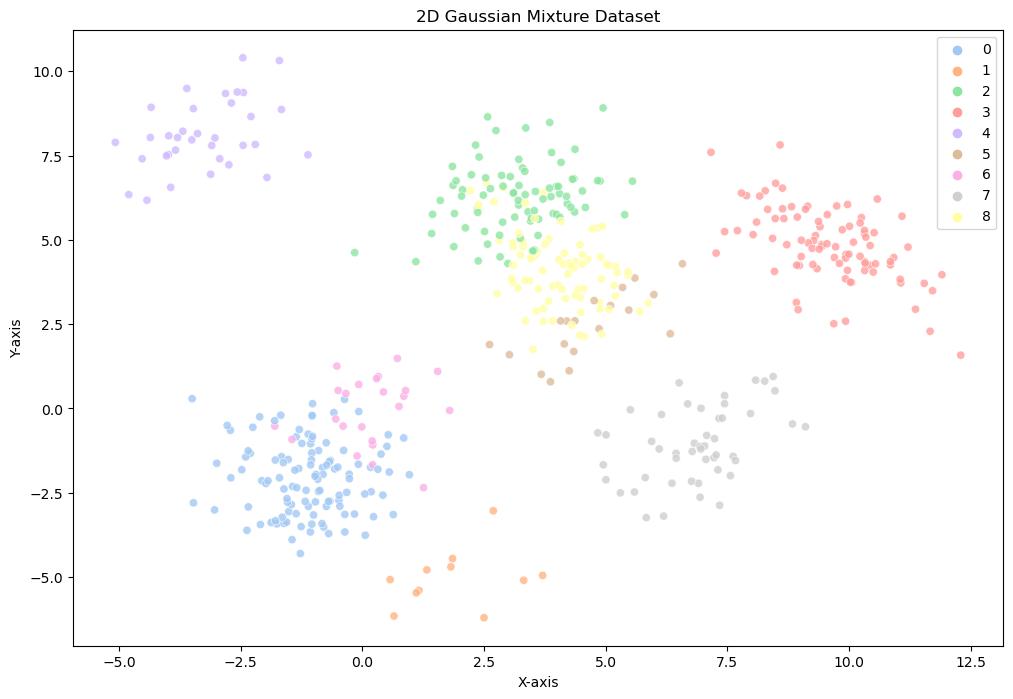

In [7]:
fig, ax = plt.subplots(figsize=(12, 8))

# Generate data points from the 2D Gaussian mixture

custom_palette = sns.color_palette("pastel", len(np.unique(labels)))  # Use Seaborn's "husl" palette for n colors

# Visualize the generated data
sns.scatterplot(x=data[:, 0], y=data[:, 1], alpha=0.8, hue=labels, ax=ax, palette=custom_palette)

# for mean, color in zip(means, custom_palette):
#     ax.plot(mean[0], mean[1], color=color, markersize=14, marker='*')


ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('2D Gaussian Mixture Dataset');

In [8]:
# from sklearn.datasets import make_moons

# # Generate non-Gaussian clusters using make_moons
# data, labels = make_moons(n_samples=300, noise=0.1, random_state=42)

# # Plot the clusters
# plt.figure(figsize=(8, 6))
# plt.scatter(data[:, 0], data[:, 1], c='red', marker='o', edgecolors='k')
# plt.title('Non-Gaussian Clusters (make_moons)')
# plt.xlabel('X')
# plt.ylabel('Y')

#### random state 43

In [9]:
# Example
epochs = 250

k = 7
lattice = RectangularLattice((k, k))
som = SOCEM(lattice, sigma_start = 0.9, sigma_step = 0.02, max_iter=epochs, betta=0.1, cov_type='spherical', random_state=None, use_weights=False, method='bhattacharyya')

In [10]:
monitor = som.fit(data)

d:\thesis\src\som_clustering\SOCEM.py:176: RuntimeWarning: invalid value encountered in divide
  mean = (self.H_ @ cluster_sums) / denominator[:, np.newaxis]


Empty clusters detected
Neurons-> odict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])
Best pair -> (36, 43)
Merged -> 36, 43
Map changed ->  True
Neurons-> odict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48])
Best pair -> (41, 48)
Merged -> 41, 48
Map changed ->  True
Neurons-> odict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47])
Best pair -> (0, 7)
Merged -> 0, 7
Map changed ->  True
Neurons-> odict_keys([0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47])
Best pair -> (38, 45)
Merged -> 38,

In [11]:
monitor

In [12]:
plt.rcParams['animation.embed_limit'] = 280

In [ ]:
custom_palette = sns.color_palette("pastel", 49)

fig, ax = plt.subplots(figsize=(12, 8))

def update(frame):
    ax.clear()
    monitor.draw(ax, 'PbSOM', frame, data, None, custom_palette)
    

anim = FuncAnimation(fig, update, frames=monitor.idx_, interval=500, blit=False)

plt.close()  # Prevents the initial plot from displaying

# Display the animations as HTML5 video in the notebook
HTML(anim.to_jshtml())

In [14]:
clustering = PbSOMClustering(som, None, None)

In [15]:
monitor2 = clustering.em_reduction(data, 1e-5)

Neuron: 22 killed


Neuron: 30 killed
Neuron: 39 killed
Neuron: 14 killed
Neuron: 18 killed
Neuron: 34 killed
Neuron: 16 killed
Neuron: 20 killed
Neuron: 32 killed
Neuron: 42 killed
Neuron: 36 killed
Neuron: 4 killed
Neuron: 21 killed
Neuron: 26 killed
Neuron: 40 killed
Neuron: 2 killed
Neuron: 23 killed
Neuron: 0 killed


In [16]:
clustering.neurons_

OrderedDict([(0, <Utils.Neuron at 0x13007766b50>),
             (2, <Utils.Neuron at 0x130053a87d0>),
             (4, <Utils.Neuron at 0x1307f63afd0>),
             (5, <Utils.Neuron at 0x130075c3b90>),
             (21, <Utils.Neuron at 0x13007766d50>),
             (23, <Utils.Neuron at 0x130077640d0>),
             (26, <Utils.Neuron at 0x1300591fc50>),
             (38, <Utils.Neuron at 0x1300794fe50>),
             (40, <Utils.Neuron at 0x13007765d50>)])

In [ ]:
custom_palette = sns.color_palette("pastel", 49)

fig2, ax2 = plt.subplots(figsize=(12, 8))

def update(frame):
    ax2.clear()
    monitor2.draw(ax2, 'PbSOM', frame, data, None, custom_palette)
    

anim = FuncAnimation(fig2, update, frames=monitor2.idx_, interval=500, blit=False)

plt.close()  # Prevents the initial plot from displaying

# Display the animations as HTML5 video in the notebook
HTML(anim.to_jshtml())

In [18]:
# from matplotlib.patches import Ellipse

# fig, ax = plt.subplots(figsize=(10, 6))

# for neuron_idx, neuron in clustering.neurons_.items():
#     mean = neuron.mean_
#     cov = neuron.cov_
#     weight = neuron.weight_

#     eigenvalues, eigenvectors = np.linalg.eigh(cov)
#     angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))
#     width, height = 2 * np.sqrt(5.991 * eigenvalues)
#     ell = Ellipse(xy=mean, width=width, height=height, angle=angle, color='black', fill=False)
#     ax.add_patch(ell)
#     ax.text(mean[0], mean[1], str(neuron_idx), color='red', fontsize=12, ha='center', va='center')
#     ax.plot(mean[0], mean[1], color='black', markersize=50*weight, marker='*')[0]

In [19]:
y_pred=clustering.predict(data)
neurons_indexes = clustering.neurons_.keys()

In [20]:
neurons_indexes

odict_keys([0, 2, 4, 5, 21, 23, 26, 38, 40])

Best pair:23, 38 to merge
Best pair:21, 23 to merge
Best pair:5, 26 to merge
Best pair:4, 5 to merge
Best pair:0, 21 to merge
Best pair:0, 2 to merge
Best pair:0, 4 to merge
Best pair:0, 40 to merge


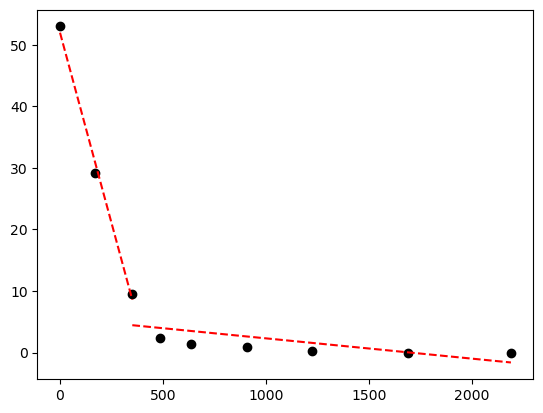

Clusters removed number:2


In [21]:
y_pred_history = clustering.combine_gmm_entropy(data)

In [22]:
y_pred = y_pred_history[2]

<Axes: >

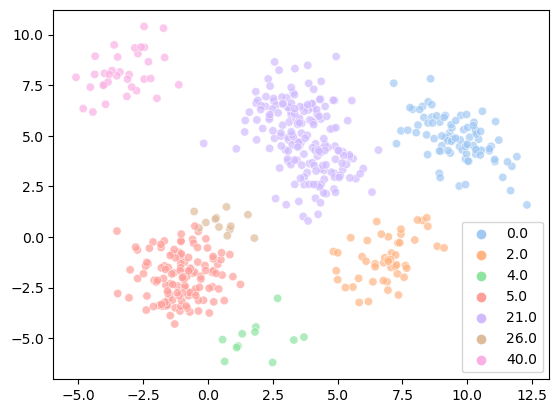

In [23]:
custom_palette = sns.color_palette("pastel", 49)
sns.scatterplot(x=data[:, 0], y=data[:, 1], 
                    alpha=0.7, 
                    hue=y_pred, 
                    palette="pastel")

### Comparison

In [24]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn import metrics

def model_info(model_labels, true_labels):
    # Function that shows crosstab of cluster and actual labels

    df = pd.DataFrame({'clust_label': model_labels, 'orig_label': true_labels})
    ct = pd.crosstab(df['clust_label'], df['orig_label'])
    display(ct)


def clustering_quality(y_true, y_pred):
    print("Adjusted Rand Index:", metrics.adjusted_rand_score(y_true, y_pred))
    print("Normalized Mutual Information:", metrics.normalized_mutual_info_score(y_true, y_pred))
    print("Adjusted Mutual Information:", metrics.adjusted_mutual_info_score(y_true, y_pred))
    print("V-Measure:", metrics.v_measure_score(y_true, y_pred))
    print("Fowlkes-Mallows Score:", metrics.fowlkes_mallows_score(y_true, y_pred))

In [25]:
clustering_quality(labels, y_pred)

Adjusted Rand Index: 0.7202723223526091
Normalized Mutual Information: 0.8736427168862839
Adjusted Mutual Information: 0.8699066793782176
V-Measure: 0.8736427168862839
Fowlkes-Mallows Score: 0.7921573163580109


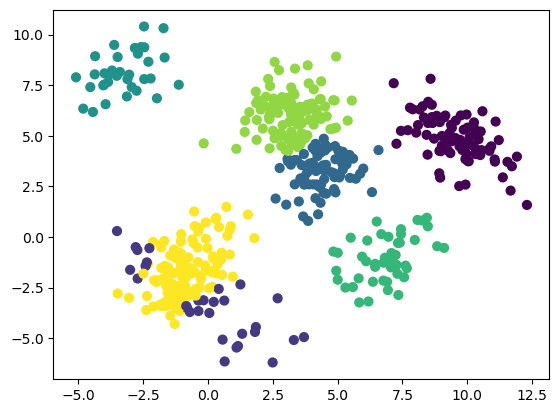

In [26]:
gmm = GaussianMixture(n_components=7, covariance_type='full')

# Fit the model to the data
gmm.fit(data)
gmm_pred = gmm.predict(data)

# Plot the clusters
plt.scatter(data[:, 0], data[:, 1], c=gmm_pred, s=40, cmap='viridis');

In [27]:
clustering_quality(labels, gmm_pred)

Adjusted Rand Index: 0.7390019953833609
Normalized Mutual Information: 0.848813876008971
Adjusted Mutual Information: 0.8446232151628076
V-Measure: 0.848813876008971
Fowlkes-Mallows Score: 0.7822989445494017


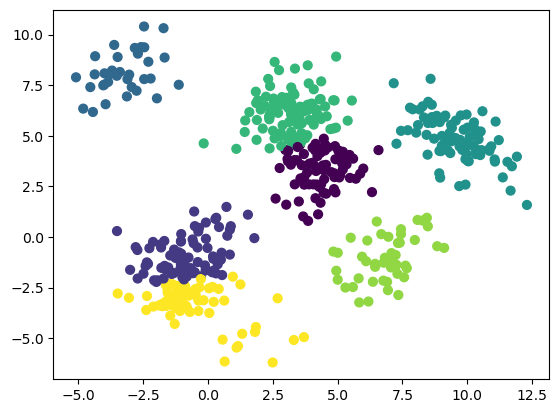

In [28]:
kmeans = KMeans(n_clusters=7, n_init='auto')

# Fit the model to the data
kmeans.fit(data)

# Get cluster centroids and labels
centroids = kmeans.cluster_centers_
kmeans_pred = kmeans.labels_

# Plot the clusters and centroids
plt.scatter(data[:, 0], data[:, 1], c=kmeans_pred, s=40, cmap='viridis');

In [29]:
clustering_quality(labels, kmeans_pred)

Adjusted Rand Index: 0.6997710104265309
Normalized Mutual Information: 0.8337011532080082
Adjusted Mutual Information: 0.8291770520991862
V-Measure: 0.8337011532080082
Fowlkes-Mallows Score: 0.7459185922382084


## Real data example

In [30]:
df = pd.read_csv("..//data/img_segmentation/segmentation.test")

In [31]:
df

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
GRASS,110.0,189.0,9,0.000000,0.0,1.000000,0.666667,1.222222,1.186342,12.925926,10.888889,9.222222,18.666668,-6.111111,-11.111111,17.222221,18.666668,0.508139,1.910864
GRASS,86.0,187.0,9,0.000000,0.0,1.111111,0.720082,1.444444,0.750309,13.740741,11.666667,10.333334,19.222221,-6.222222,-10.222222,16.444445,19.222221,0.463329,1.941465
GRASS,225.0,244.0,9,0.000000,0.0,3.388889,2.195113,3.000000,1.520234,12.259259,10.333334,9.333334,17.111110,-5.777778,-8.777778,14.555555,17.111110,0.480149,1.987902
GRASS,47.0,232.0,9,0.000000,0.0,1.277778,1.254621,1.000000,0.894427,12.703704,11.000000,9.000000,18.111110,-5.111111,-11.111111,16.222221,18.111110,0.500966,1.875362
GRASS,97.0,186.0,9,0.000000,0.0,1.166667,0.691215,1.166667,1.005540,15.592592,13.888889,11.777778,21.111110,-5.111111,-11.444445,16.555555,21.111110,0.442661,1.863654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CEMENT,32.0,158.0,9,0.000000,0.0,0.944445,0.862963,0.833333,0.611111,7.962963,6.333334,11.888889,5.666666,-4.888889,11.777778,-6.888889,11.888889,0.520578,-1.982834
CEMENT,8.0,162.0,9,0.111111,0.0,1.611111,2.062962,0.333333,0.133333,8.370370,6.666666,12.000000,6.444445,-5.111111,10.888889,-5.777778,12.000000,0.484805,-2.044946
CEMENT,128.0,161.0,9,0.000000,0.0,0.555555,0.251852,0.777778,0.162963,7.148148,5.555555,10.888889,5.000000,-4.777778,11.222222,-6.444445,10.888889,0.540918,-1.996307
CEMENT,150.0,158.0,9,0.000000,0.0,2.166667,1.633334,1.388889,0.418518,8.444445,7.000000,12.222222,6.111111,-4.333334,11.333333,-7.000000,12.222222,0.503086,-1.943449


In [32]:
df.columns

Index(['REGION-CENTROID-COL', 'REGION-CENTROID-ROW', 'REGION-PIXEL-COUNT',
       'SHORT-LINE-DENSITY-5', 'SHORT-LINE-DENSITY-2', 'VEDGE-MEAN',
       'VEDGE-SD', 'HEDGE-MEAN', 'HEDGE-SD', 'INTENSITY-MEAN', 'RAWRED-MEAN',
       'RAWBLUE-MEAN', 'RAWGREEN-MEAN', 'EXRED-MEAN', 'EXBLUE-MEAN',
       'EXGREEN-MEAN', 'VALUE-MEAN', 'SATURATION-MEAN', 'HUE-MEAN'],
      dtype='object')

In [33]:
y_true = np.array(df.index)

In [34]:
y_true

array(['GRASS', 'GRASS', 'GRASS', ..., 'CEMENT', 'CEMENT', 'CEMENT'],
      dtype=object)

In [35]:
df = df.reset_index()
df.drop(columns='index', inplace=True)

In [36]:
df

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,110.0,189.0,9,0.000000,0.0,1.000000,0.666667,1.222222,1.186342,12.925926,10.888889,9.222222,18.666668,-6.111111,-11.111111,17.222221,18.666668,0.508139,1.910864
1,86.0,187.0,9,0.000000,0.0,1.111111,0.720082,1.444444,0.750309,13.740741,11.666667,10.333334,19.222221,-6.222222,-10.222222,16.444445,19.222221,0.463329,1.941465
2,225.0,244.0,9,0.000000,0.0,3.388889,2.195113,3.000000,1.520234,12.259259,10.333334,9.333334,17.111110,-5.777778,-8.777778,14.555555,17.111110,0.480149,1.987902
3,47.0,232.0,9,0.000000,0.0,1.277778,1.254621,1.000000,0.894427,12.703704,11.000000,9.000000,18.111110,-5.111111,-11.111111,16.222221,18.111110,0.500966,1.875362
4,97.0,186.0,9,0.000000,0.0,1.166667,0.691215,1.166667,1.005540,15.592592,13.888889,11.777778,21.111110,-5.111111,-11.444445,16.555555,21.111110,0.442661,1.863654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,32.0,158.0,9,0.000000,0.0,0.944445,0.862963,0.833333,0.611111,7.962963,6.333334,11.888889,5.666666,-4.888889,11.777778,-6.888889,11.888889,0.520578,-1.982834
2096,8.0,162.0,9,0.111111,0.0,1.611111,2.062962,0.333333,0.133333,8.370370,6.666666,12.000000,6.444445,-5.111111,10.888889,-5.777778,12.000000,0.484805,-2.044946
2097,128.0,161.0,9,0.000000,0.0,0.555555,0.251852,0.777778,0.162963,7.148148,5.555555,10.888889,5.000000,-4.777778,11.222222,-6.444445,10.888889,0.540918,-1.996307
2098,150.0,158.0,9,0.000000,0.0,2.166667,1.633334,1.388889,0.418518,8.444445,7.000000,12.222222,6.111111,-4.333334,11.333333,-7.000000,12.222222,0.503086,-1.943449


In [37]:
df.describe()

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
count,2100.000000,2100.000000,2100.0,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2.100000e+03,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,124.940476,123.483333,9.0,0.014921,0.004550,1.890820,5.708299,2.406772,7.904224e+00,37.047654,32.806667,44.205556,34.130741,-12.722963,21.473704,-8.750741,45.162381,0.427259,-1.365147
std,72.858637,57.431428,0.0,0.041024,0.023573,2.649453,44.989359,3.469954,5.347107e+01,38.135291,34.994538,43.510119,36.303768,11.588214,19.654107,11.606996,42.900582,0.228458,1.544278
min,1.000000,11.000000,9.0,0.000000,0.000000,0.000000,0.000000,0.000000,-1.589457e-08,0.000000,0.000000,0.000000,0.000000,-49.666668,-12.444445,-33.888890,0.000000,0.000000,-3.044175
25%,62.000000,81.000000,9.0,0.000000,0.000000,0.722222,0.349603,0.833332,4.216377e-01,7.472222,7.000000,9.666667,6.222222,-18.583333,4.305556,-17.000000,11.777778,0.284934,-2.188539
50%,121.000000,122.000000,9.0,0.000000,0.000000,1.277776,0.833333,1.444444,9.897442e-01,21.666666,19.666668,27.777779,20.444445,-10.888889,19.666666,-11.000000,28.666666,0.375064,-2.052625
75%,188.250000,171.250000,9.0,0.000000,0.000000,2.222221,1.807406,2.555556,2.251852e+00,53.277778,47.333332,65.000000,46.388888,-4.222222,36.111110,-3.222222,65.000000,0.540228,-1.565745
max,254.000000,251.000000,9.0,0.333333,0.222222,29.222221,991.718400,44.722225,1.386329e+03,143.444440,137.111110,150.888890,142.555560,9.888889,82.000000,24.666666,150.888890,1.000000,2.912480


Furthermore, for color components,
we only use the HIS color space. The 9 variables used here are the 4th to 9th and 17th to  
19th features in the original dataset (Blake, Keogh, and Merz 1998).   
[Clustering Based on a Multilayer Mixture Model](https://doi.org/10.1198/106186005X59586)

<Axes: >

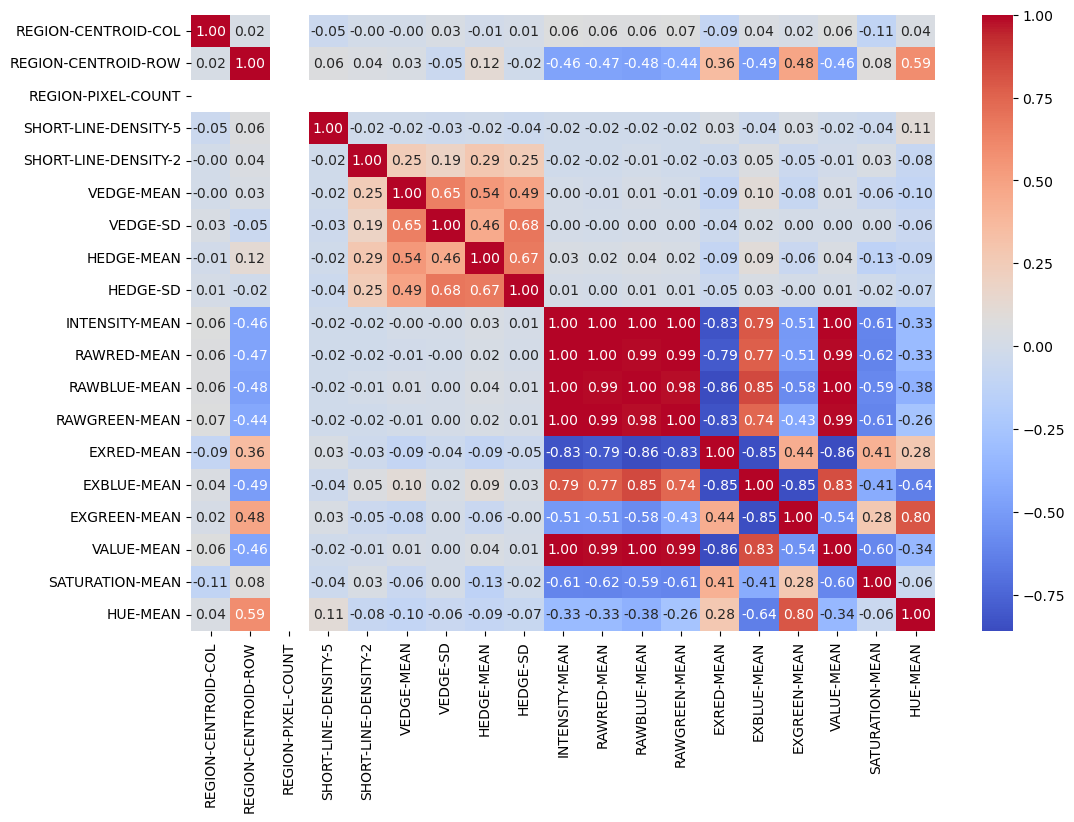

In [38]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", ax=ax)

In [39]:
df = df.iloc[:, list(range(3, 8)) + list(range(16, 19))]

<Axes: >

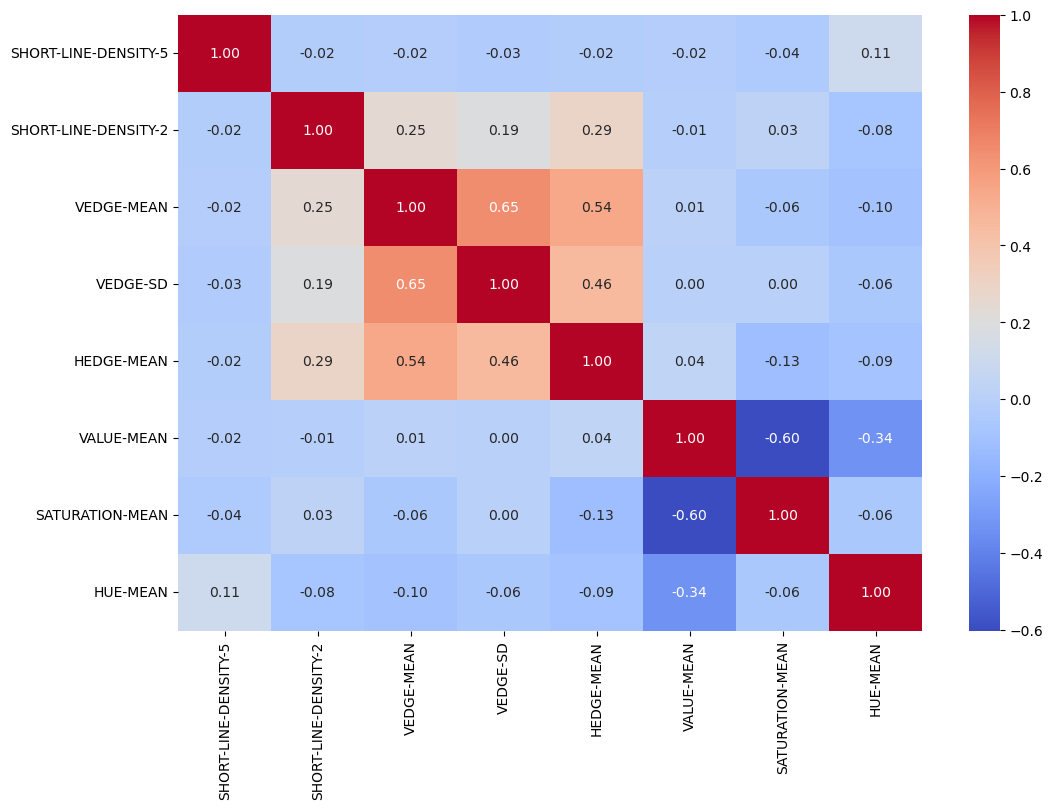

In [40]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", ax=ax)

In [41]:
X = df.values

In [42]:
X

array([[ 0.        ,  0.        ,  1.0000004 , ..., 18.666668  ,
         0.50813884,  1.9108642 ],
       [ 0.        ,  0.        ,  1.1111108 , ..., 19.222221  ,
         0.46332908,  1.9414649 ],
       [ 0.        ,  0.        ,  3.3888886 , ..., 17.11111   ,
         0.48014903,  1.9879022 ],
       ...,
       [ 0.        ,  0.        ,  0.55555534, ..., 10.888889  ,
         0.5409177 , -1.9963073 ],
       [ 0.        ,  0.        ,  2.166667  , ..., 12.222222  ,
         0.50308645, -1.9434487 ],
       [ 0.11111111,  0.        ,  1.3888888 , ..., 14.555555  ,
         0.4799313 , -2.0293121 ]])

In [43]:
# Example
epochs = 250

k = 7
lattice = RectangularLattice((k, k))
som = SOCEM(lattice, sigma_start = 0.7, sigma_step = 0.02, max_iter=epochs, betta=0.04, cov_type='spherical', random_state=None, use_weights=False, method='bhattacharyya', reg_covar=1e-3)

In [44]:
monitor = som.fit(X)

d:\thesis\src\som_clustering\SOCEM.py:176: RuntimeWarning: invalid value encountered in divide
  mean = (self.H_ @ cluster_sums) / denominator[:, np.newaxis]


Empty clusters detected
Neurons-> odict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])
Best pair -> (26, 33)
Merged -> 26, 33
Map changed ->  True
Neurons-> odict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])
Best pair -> (15, 16)
Merged -> 15, 16
Map changed ->  True
Neurons-> odict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])
Best pair -> (39, 46)
Merged -> 39, 46
Map changed ->  True
Neurons-> odict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48])


In [45]:
y_pred = som.predict(X)

In [46]:
y_pred

array([7, 7, 7, ..., 8, 8, 8])

In [47]:
labels, occurrences = np.unique(y_pred, return_counts=True)

In [48]:
len(labels)

44

### EM reduction

In [49]:
clustering = PbSOMClustering(som, None, None)

In [50]:
monitor2 = clustering.em_reduction(X, 1e-5)

Neuron: 3 killed
Neuron: 4 killed
Neuron: 6 killed
Neuron: 9 killed
Neuron: 10 killed
Neuron: 11 killed
Neuron: 17 killed
Neuron: 18 killed
Neuron: 20 killed
Neuron: 23 killed
Neuron: 25 killed
Neuron: 27 killed
Neuron: 28 killed
Neuron: 30 killed
Neuron: 31 killed
Neuron: 32 killed
Neuron: 34 killed
Neuron: 36 killed
Neuron: 37 killed
Neuron: 38 killed
Neuron: 39 killed
Neuron: 41 killed
Neuron: 42 killed
Neuron: 43 killed
Neuron: 44 killed
Neuron: 47 killed
Neuron: 48 killed
Neuron: 19 killed
Neuron: 15 killed
Neuron: 5 killed
Neuron: 45 killed
Neuron: 22 killed
Neuron: 0 killed
Neuron: 29 killed
Neuron: 1 killed
Neuron: 26 killed
Neuron: 13 killed
Neuron: 14 killed
Neuron: 8 killed
Neuron: 12 killed
Neuron: 7 killed
Neuron: 21 killed


In [51]:
clustering.neurons_

OrderedDict([(0, <Utils.Neuron at 0x13005635a50>),
             (1, <Utils.Neuron at 0x130055b6c10>),
             (7, <Utils.Neuron at 0x13005587490>),
             (8, <Utils.Neuron at 0x130055b59d0>),
             (12, <Utils.Neuron at 0x1300569cb50>),
             (13, <Utils.Neuron at 0x130055b69d0>),
             (14, <Utils.Neuron at 0x130075a2ed0>),
             (21, <Utils.Neuron at 0x130056354d0>),
             (22, <Utils.Neuron at 0x130055b51d0>),
             (24, <Utils.Neuron at 0x13005535d90>),
             (26, <Utils.Neuron at 0x13005636990>),
             (29, <Utils.Neuron at 0x13005636e50>),
             (40, <Utils.Neuron at 0x13005634850>),
             (45, <Utils.Neuron at 0x130055b7210>)])

In [52]:
y_pred = clustering.predict(X)

In [53]:
model_info(y_pred, y_true)

orig_label,BRICKFACE,CEMENT,FOLIAGE,GRASS,PATH,SKY,WINDOW
clust_label,,,,,,,
0,0,0,11,0,0,0,45
1,123,0,91,0,0,0,51
7,0,0,0,296,0,0,0
8,0,1,46,0,0,0,23
12,0,0,0,0,0,158,0
13,0,0,0,0,0,137,0
14,24,32,71,1,2,0,122
21,153,12,3,1,0,0,8
22,0,24,0,1,48,0,1


In [54]:
clustering_quality(y_pred, y_true)

Adjusted Rand Index: 0.4463376425435348
Normalized Mutual Information: 0.6021806805909162
Adjusted Mutual Information: 0.5987624383059058
V-Measure: 0.6021806805909161
Fowlkes-Mallows Score: 0.5202817971460125


### GMM merging

Best pair:24, 40 to merge
Best pair:14, 21 to merge
Best pair:8, 14 to merge
Best pair:8, 26 to merge
Best pair:8, 24 to merge
Best pair:1, 8 to merge
Best pair:1, 22 to merge
Best pair:12, 13 to merge
Best pair:1, 29 to merge
Best pair:1, 45 to merge
Best pair:1, 12 to merge
Best pair:0, 1 to merge
Best pair:0, 7 to merge


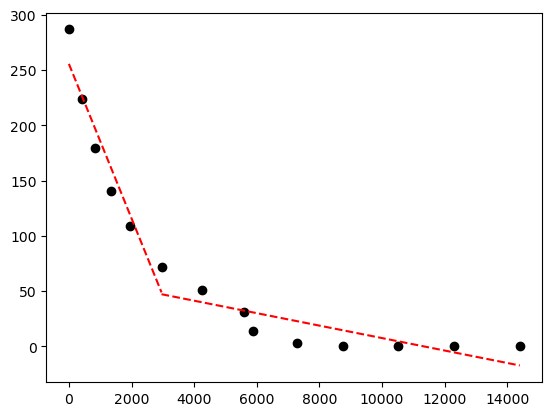

Clusters removed number:5


In [55]:
y_pred_entropy_hist = clustering.combine_gmm_entropy(X)

In [56]:
y_pred_entropy = y_pred_entropy_hist[5]

In [57]:
model_info(y_pred_entropy, y_true)

orig_label,BRICKFACE,CEMENT,FOLIAGE,GRASS,PATH,SKY,WINDOW
clust_label,,,,,,,
0.0,0,0,11,0,0,0,45
1.0,123,0,91,0,0,0,51
7.0,0,0,0,296,0,0,0
8.0,177,259,128,3,252,5,191
12.0,0,0,0,0,0,158,0
13.0,0,0,0,0,0,137,0
22.0,0,24,0,1,48,0,1
29.0,0,10,37,0,0,0,6
45.0,0,7,33,0,0,0,6


In [58]:
clustering_quality(y_true, y_pred_entropy)

Adjusted Rand Index: 0.2645884460992344
Normalized Mutual Information: 0.5306531367934071
Adjusted Mutual Information: 0.5275998677892364
V-Measure: 0.5306531367934072
Fowlkes-Mallows Score: 0.42757955608324405


It's probably not working(